In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(42)

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

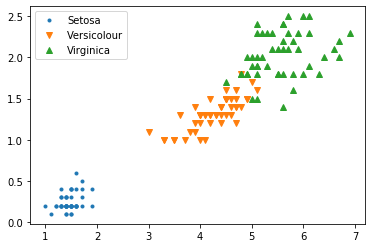

In [3]:
from data import load_data

x, y = load_data()

plt.figure()
plt.plot(x[:, 0][y==0], x[:, 1][y==0], '.', label='Setosa')
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'v', label='Versicolour')
plt.plot(x[:, 0][y==2], x[:, 1][y==2], '^', label='Virginica')
plt.legend()
plt.show()

In [4]:
from data import load_setosa_vs_versicolor

x, y = load_setosa_vs_versicolor()

In [5]:
from sklearn.svm import SVC

model = SVC(kernel="linear", C=float("inf"))
model.fit(x, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

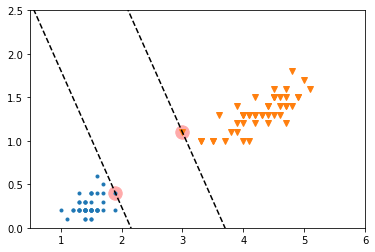

In [6]:
w, b = model.coef_[0], model.intercept_[0]
x_range = np.linspace(0.5, 8, 200)
decision_boundary = -w[0]/w[1] * x_range - b/w[1]

plt.figure()
plt.plot(x[:, 0][y==0], x[:, 1][y==0], '.', label='Setosa')
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'v', label='Versicolour')

support_vectors = model.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=180, facecolors='#FFAAAA')

margin = 1 / w[1]
plt.plot(x_range, decision_boundary + margin, "k--")
plt.plot(x_range, decision_boundary - margin, "k--")
plt.axis([0.5, 6, 0, 2.5])

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
model.fit(x, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

0.9744196057399953


[-2, 2, -2, 2]

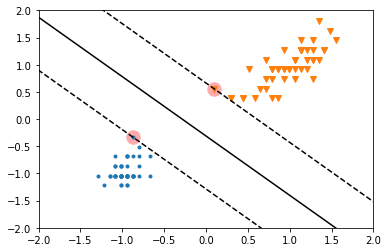

In [8]:
w = model.coef_[0]
b = model.intercept_[0]
x_range = np.linspace(-3, 3, 200)
decision_boundary = -w[0]/w[1] * x_range - b/w[1]

plt.plot(x[:, 0][y==0], x[:, 1][y==0], '.', label='Setosa')
plt.plot(x[:, 0][y==1], x[:, 1][y==1], 'v', label='Versicolour')
plt.plot(x[:, 0][y==2], x[:, 1][y==2], '^', label='Virginica')
svs = model.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')

margin = 1/w[1]
print(margin)
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
plt.plot(x_range, gutter_up, "k--")
plt.plot(x_range, gutter_down, "k--")

plt.plot(x_range, decision_boundary, "k-")
plt.axis([-2, 2, -2, 2])